In [ ]:
//@version=5
indicator("Synthetic Gamma Exposure (GEX) w/ Session Highlight", overlay = false)

// === Inputs ===
strike_price = input.float(2000, title="Synthetic Strike Price")
scale_factor = input.float(0.00005, title="Scale Factor (Sensitivity)")
use_volume = input.bool(true, title="Multiply by Volume?")

// === Price Data ===
price = close
vol = use_volume ? volume : 1
gex = math.pow(price - strike_price, 2) * vol * scale_factor

// === Daily Reset Logic (00:00 UTC) ===
is_new_day = ta.change(time("D"))

// === Track Daily High GEX ===
var float daily_high_gex = na
if is_new_day
    daily_high_gex := gex
else if gex > daily_high_gex
    daily_high_gex := gex

// === Track All-Time High GEX ===
var float all_time_high_gex = na
if na(all_time_high_gex) or gex > all_time_high_gex
    all_time_high_gex := gex

// === Plot Color Logic ===
bar_color = gex == all_time_high_gex ? color.red : (gex == daily_high_gex ? color.orange : color.blue)

// === Highlight 4:00 UTC Bar ===
bar_hour = hour(time, "UTC")
bar_minute = minute(time, "UTC")
is_four_am_utc = bar_hour == 4 and bar_minute == 0

// === Plot GEX with Highlight ===
plot(gex, title="Gamma Exposure", style=plot.style_columns, color=is_four_am_utc ? color.black : bar_color)
hline(0, 'Zero Line', color=color.gray)

// === Optional: visually color bar on main chart if overlay = true ===
// barcolor(is_four_am_utc ? color.teal : na)  // Uncomment if indicator(…, overlay=true)


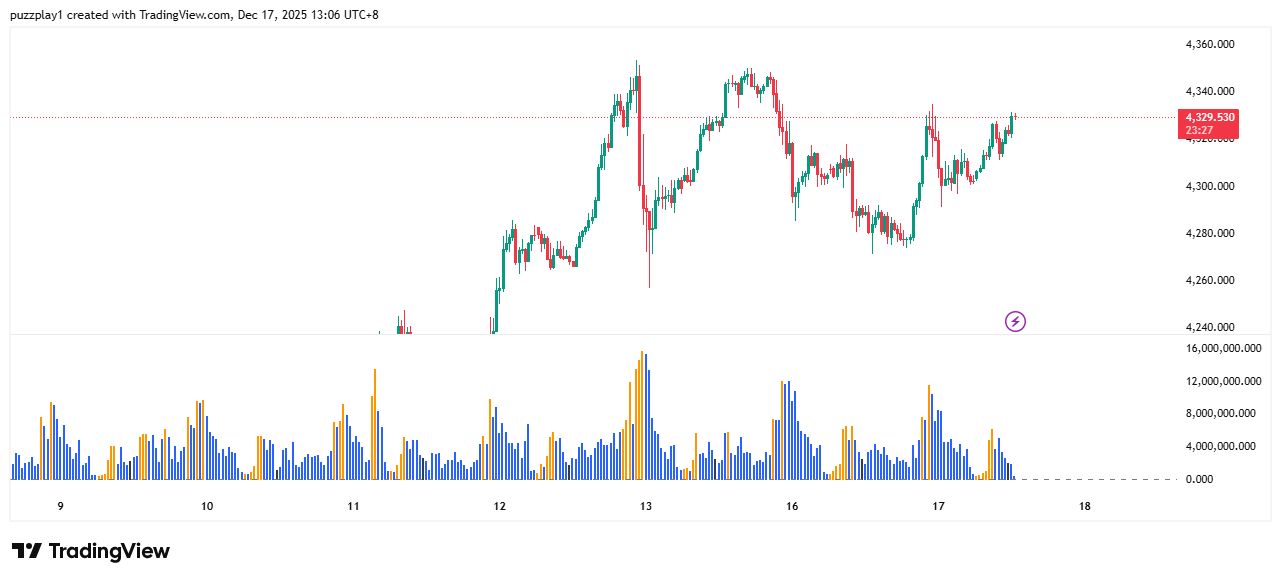

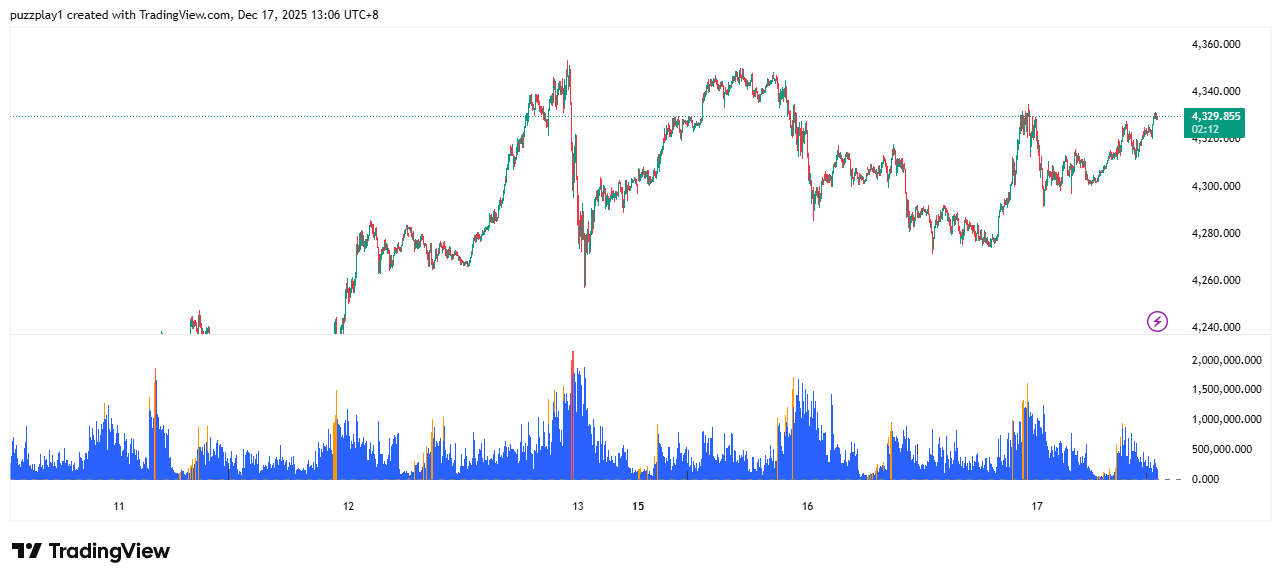